# Creating a dynamical decoupling sequence

This notebook illustrates how to use Q-CTRL Open Controls to create [dynamical decoupling sequences](https://en.wikipedia.org/wiki/Dynamical_decoupling). 

Dynamical decoupling is the use of fast pulses, often treated as instant ideal unitary operations, on a qubit to decouple it from its environment and improve its coherence time. The train of pulses is called a sequence, hence "dynamical decoupling sequence" (DDS). DDSs can be used to increase the coherence time of a qubit or they can be used as part of a characterization process to identify coherence time and/or noise spectra.

Q-CTRL Open Controls can be used to create a DDS from a library of well-known dynamical decoupling schemes. Once created, the DDS can be printed, plotted, and exported in CSV or JSON format for use on a quantum computer or any of [Q-CTRL's products](https://q-ctrl.com/products/).

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qctrlopencontrols import (
    new_spin_echo_sequence,
    new_carr_purcell_sequence,
    new_walsh_sequence,
    new_ramsey_sequence,
    new_x_concatenated_sequence,
    new_quadratic_sequence,
    DynamicDecouplingSequence,
)
from qctrlvisualizer import plot_sequences

## Predefined dynamical decoupling Schemes

Q-CTRL Open Controls can create DDSs according to the following protocols:

1. `Ramsey`
2. `spin echo`
3. `Carr-Purcell`
4. `Carr-Purcell-Meiboom-Gill`
5. `Uhrig`
6. `periodic`
7. `Walsh single-axis`
8. `quadratic`
9. `X concatenated`
10. `XY concatenated`

See the [documentation](https://docs.q-ctrl.com/open-controls/references/qctrl-open-controls/qctrlopencontrols.html) for details.

## Creating and printing a DDS

A DDS is defined as a set of instant unitary operations, each defined by a `rabi_rotation`, `azimuthal_angle`, `detuning_angle`, and `offset` (giving the time at which the operation is applied). The mathematical definition of a sequence is explained in the [documentation](https://docs.q-ctrl.com/open-controls/references/qctrl-open-controls/qctrlopencontrols/DynamicDecouplingSequence.html#qctrlopencontrols.DynamicDecouplingSequence).

Q-CTRL Open controls provides a set of functions to generate commonly used DDSs. For each sequence, the detailed mathematical definition can be found in the [documentation](https://docs.q-ctrl.com/open-controls/references/qctrl-open-controls/qctrlopencontrols.html#qctrlopencontrols).
Below we give a few examples of generating DDSs.

In [2]:
## Spin echo sequence
se_dds = new_spin_echo_sequence(duration=10e-6, name="SE DDS")
print(se_dds)

SE DDS:
Duration = 1e-05
Offsets = [0.5] × 1e-05
Rabi Rotations = [1.0] × pi
Azimuthal Angles = [0.0] × pi
Detuning Rotations = [0.0] × pi


In [3]:
## Carr-Purcell sequence
cp_dds = new_carr_purcell_sequence(duration=10e-6, offset_count=4.0, name="CP DDS")
print(cp_dds)

CP DDS:
Duration = 1e-05
Offsets = [0.125, 0.375, 0.625, 0.875] × 1e-05
Rabi Rotations = [1.0, 1.0, 1.0, 1.0] × pi
Azimuthal Angles = [0.0, 0.0, 0.0, 0.0] × pi
Detuning Rotations = [0.0, 0.0, 0.0, 0.0] × pi


In [4]:
## Walsh single-axis
walsh_dds = new_walsh_sequence(duration=10e-6, paley_order=4.0, name="Walsh DDS")
print(walsh_dds)

Walsh DDS:
Duration = 1e-05
Offsets = [0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0.875] × 1e-05
Rabi Rotations = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0] × pi
Azimuthal Angles = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] × pi
Detuning Rotations = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] × pi


In [5]:
## Quadratic sequence
quadratic_dds = new_quadratic_sequence(
    duration=10e-6, inner_offset_count=2, outer_offset_count=2, name="Quadratic DDS"
)
print(quadratic_dds)

Quadratic DDS:
Duration = 1e-05
Offsets = [0.06249999999999998, 0.18749999999999994, 0.24999999999999994, 0.37499999999999994, 0.6249999999999999, 0.7499999999999999, 0.8124999999999999, 0.9375] × 1e-05
Rabi Rotations = [0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0] × pi
Azimuthal Angles = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] × pi
Detuning Rotations = [1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0] × pi


In [6]:
## X concatenated sequence
## 'XY concatenated' scheme uses the same keyword
xc_dds = new_x_concatenated_sequence(
    duration=10e-6, concatenation_order=2, name="XC DDS"
)
print(xc_dds)

XC DDS:
Duration = 1e-05
Offsets = [0.25, 0.75] × 1e-05
Rabi Rotations = [1.0, 1.0] × pi
Azimuthal Angles = [0.0, 0.0] × pi
Detuning Rotations = [0.0, 0.0] × pi


In [7]:
## Ramsay DDS
ramsey_dds = new_ramsey_sequence(duration=1e-6, name="Ramsey DDS")
print(ramsey_dds)

Ramsey DDS:
Duration = 1e-06
Offsets = [] × 1e-06
Rabi Rotations = [] × pi
Azimuthal Angles = [] × pi
Detuning Rotations = [] × pi


### Plotting a DDS

Once created, Q-CTRL Open Controls provides the method `export` to create a set of formatted arrays ready to be immediately plotted with Matplotlib and the `plot_sequences` method of the Q-CTRL Python Visualizer package. We use the `quadratic_dds` as a sample sequence to generate plots of the `rabi_rotations`, `azimuthal_angles` and `detuning_rotations`.

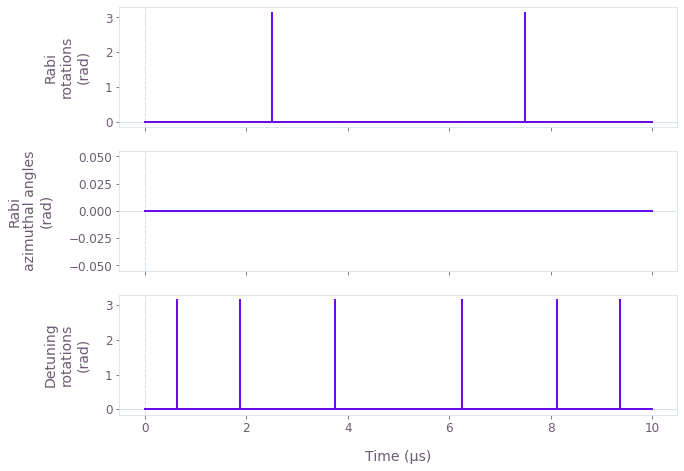

In [8]:
formatted_plot_data = quadratic_dds.export()
figure = plt.figure()
plot_sequences(figure, formatted_plot_data)

### Exporting the DDS

Q-CTRL Open Controls enables exporting DDS in CSV or JSON format.

An ideal DDS is defined as a sequence of instantaneously-applied pulses, which correspond to instantaneous rotations of the Bloch sphere. However, in reality, the rate of rotation is limited by the `maximum_rabi_rate` and/or `maximum_detuning_rate` for a given pulse. Due to this limiting factor, the target rotation is implemented over a control segment with finite duration. Q-CTRL Open Controls converts a `DynamicDecouplingSequence` into a `DrivenControl` before exporting the resulting `DrivenControl`. This conversion requires the `maximum_rabi_rate` and `maximum_detuning_rate` to be specified and raises an error if the conversion is not successful (e.g. if control segments overlap due to a low `maximum_rabi_rate` or `maximum_detuning_rate`).

Q-CTRL Open Controls can export a sequence in either `cartesian` or `cylindrical` coordinates. For details, consult the [documentation](https://docs.q-ctrl.com/open-controls/references/qctrl-open-controls/qctrlopencontrols/DrivenControl.export_to_file.html).

In the example below, we chose the `quadratic_dds` (created above) for exporting to a CSV file.

In [9]:
file_type = "CSV"
filename = "example_sequence.csv"

quadratic_dds.export_to_file(
    filename=filename,
    file_type=file_type,
    maximum_rabi_rate=2e6 * np.pi,
    maximum_detuning_rate=4e6 * np.pi,
)

In [10]:
## Reload the file and check its content to better understand the format
with open(filename, "rt") as handle:
    file_content = handle.readlines()
for line in file_content:
    print(line)

azimuthal_angles,detuning,duration,maximum_rabi_rate,rabi_rates

0.0,0.0,4.999999999999999e-07,6283185.3071795935,0.0

0.0,12566370.614359176,2.4999999999999994e-07,6283185.3071795935,0.0

0.0,0.0,9.999999999999997e-07,6283185.3071795935,0.0

0.0,12566370.614359176,2.4999999999999994e-07,6283185.3071795935,0.0

0.0,0.0,2.5000000000000015e-07,6283185.3071795935,0.0

0.0,0.0,5.000000000000003e-07,6283185.3071795935,0.9999999999999982

0.0,0.0,8.749999999999997e-07,6283185.3071795935,0.0

0.0,12566370.614359187,2.499999999999997e-07,6283185.3071795935,0.0

0.0,0.0,2.2500000000000005e-06,6283185.3071795935,0.0

0.0,12566370.614359207,2.499999999999993e-07,6283185.3071795935,0.0

0.0,0.0,8.750000000000001e-07,6283185.3071795935,0.0

0.0,0.0,4.999999999999994e-07,6283185.3071795935,1.0

0.0,0.0,2.50000000000001e-07,6283185.3071795935,0.0

0.0,12566370.614359207,2.499999999999993e-07,6283185.3071795935,0.0

0.0,0.0,1.0000000000000023e-06,6283185.3071795935,0.0

0.0,12566370.614359207,2.499999

## Custom definition of a DDS

An arbitrary `DynamicDecouplingSequence` can be created by providing a `duration` along with arrays for the `rabi_rotations`, `azimuthal_angles`, `detuning_rotations` and `offsets`.

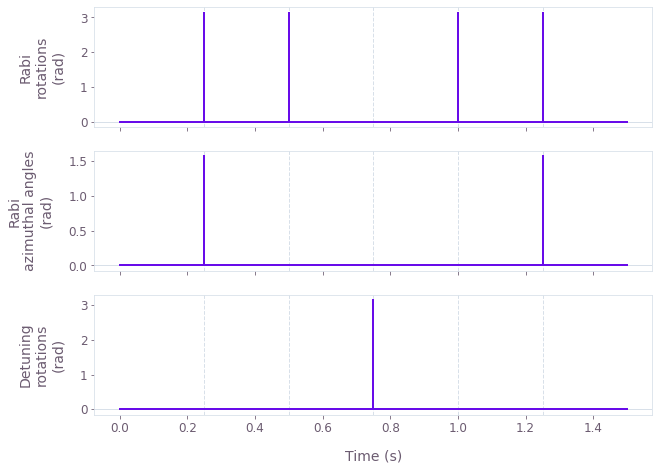

In [11]:
_duration = 1.50
_rabi_rotations = [np.pi, np.pi, 0.0, np.pi, np.pi]
_azimuthal_angles = [np.pi / 2, 0.0, 0.0, 0.0, np.pi / 2]
_detuning_rotations = [0.0, 0.0, np.pi, 0.0, 0.0]
_offsets = [0.25, 0.50, 0.75, 1.00, 1.25]
_name = "Custom DDS"

custom_dds = DynamicDecouplingSequence(
    duration=_duration,
    rabi_rotations=_rabi_rotations,
    azimuthal_angles=_azimuthal_angles,
    detuning_rotations=_detuning_rotations,
    offsets=_offsets,
    name=_name,
)

formatted_plot_data = custom_dds.export()
figure = plt.figure()
plot_sequences(figure, formatted_plot_data)